In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
from textblob import TextBlob,Word
import matplotlib.pyplot as plt
import os
import numpy as np
RawDataFrame=[]
IndexName=[]
for i in os.listdir("metinler/"):
    file = open("metinler/{}".format(i), "r", encoding='iso8859-9')#turkishcode
    IndexName.append("{}".format(i))
    filetext=file.read()
    file.close()
    RawDataFrame.append("".join(TextBlob(filetext).translate(to = "en")))
dataframe=pd.DataFrame(RawDataFrame,columns=["Comments"])
dataframe['filename']=IndexName

In [2]:
dataframe.to_csv("Translated.csv")# There is limit so i read it
dataframe

,0,filename
0,The third week of school started today. Eventu...,1.txt
1,"Hello, we have gathered half of Çırağan's lege...",10.txt
2,I can say that we brought Istanbul upside down...,100.txt
3,hey hey !!!! I'm so happy my exams are over. I...,101.txt
4,"On January 29, 2007, a long time has passed si...",102.txt
...,...,...
130,Another innocent baby who came to the world wi...,95.txt
131,"Even if your heart cries, smile out of spite\n...",96.txt
132,look at the sound of the rain\ninvites to love...,97.txt
133,I could not put a title on this article ... I ...,98.txt


In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
from textblob import TextBlob,Word
import matplotlib.pyplot as plt
import os
import numpy as np
dataframe=pd.read_csv("Translated.csv", header = 0 , index_col = 0, squeeze = True)
dataframe.columns=["Comments","filename"]
df=dataframe["Comments"]

In [2]:
df=df.apply(lambda x: " ".join(x.lower() for x in x.split()))
df=df.replace('[^\w\s:)(]','',regex=True)#regex emojiler haric
df=df.replace('\d+','',regex=True)#regex
sw=stopwords.words("english")
df=df.apply(lambda x: " ".join(x for x in x.split() if x not in sw))
df=df.apply(lambda x: TextBlob(x).words)

#stemmer = PorterStemmer()
#df=df.apply(lambda x: " ".join(stemmer.stem(word) for word in x))
df=df.apply(lambda x: " ".join(Word.lemmatize(word) for word in x)) 

In [3]:
def sentiments_score(df):
    result_score=[]
    result_class=[]
    for i in df:
        textB = TextBlob(i)
        sentiments_score = textB.sentiment.polarity
        result_score.append(sentiments_score)
        
        if sentiments_score <0.00:
            result_class.append('Negative')

        elif sentiments_score >0.00:
            result_class.append('Pozitive')

        else:
            result_class.append('Notre')
            
    return result_score,result_class

In [4]:
BiggerData=pd.DataFrame(df.values,columns=['Data'])
BiggerData['Score'],BiggerData['Class']=sentiments_score(df)
BiggerData["FileName"]=dataframe["filename"]
BiggerData.groupby("Class").count()["Score"]

Class
Negative    45
Notre        1
Pozitive    89
Name: Score, dtype: int64

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(BiggerData["Data"])

0      third week school started today eventually cla...
1      hello gathered half çırağans legendary crew ev...
2      say brought istanbul upside uncle called morni...
3      hey hey im happy exam swear im happy girl coul...
4      january long time passed since wrote last arti...
5      understand better mean want fail yet like clos...
6      im happy ordered food half hour ago condition ...
7      everything wonderful happy human world happier...
8      lord accepts prayer amine never read expositor...
9      started weaken want share happiness wrote frie...
10     hi got last news sooooooo happy cant tell glad...
11     joyful morning wonderful day want drop sorrow ...
12     yesterday wrote post piloy day happy post form...
13     opened summer season end today went aqua park ...
14     school really bad school term student profile ...
15     okay alcohol fine get annoyed beer junk sends ...
16     get annoyed dealing thing cant ive browsing bl...
17     ive getting bored lately

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(BiggerData[["FileName","Score","Class"]])

    FileName     Score     Class
0      1.txt -0.028623  Negative
1     10.txt  0.180208  Pozitive
2    100.txt  0.204685  Pozitive
3    101.txt  0.103236  Pozitive
4    102.txt  0.204785  Pozitive
5    103.txt  0.304104  Pozitive
6    104.txt  0.294444  Pozitive
7    105.txt  0.450000  Pozitive
8    106.txt -0.075000  Negative
9    107.txt -0.024351  Negative
10   108.txt  0.276494  Pozitive
11   109.txt  0.497360  Pozitive
12    11.txt  0.368795  Pozitive
13   110.txt  0.107692  Pozitive
14   111.txt -0.024537  Negative
15   112.txt -0.001961  Negative
16   113.txt -0.150103  Negative
17   114.txt -0.323958  Negative
18   115.txt -0.024074  Negative
19   116.txt -0.100000  Negative
20   117.txt -0.087500  Negative
21   118.txt -0.112821  Negative
22   119.txt -0.226840  Negative
23    12.txt  0.108910  Pozitive
24   120.txt  0.104286  Pozitive
25   121.txt  0.055952  Pozitive
26   122.txt  0.100818  Pozitive
27   123.txt  0.117059  Pozitive
28   125.txt -0.048859  Negative
29   126.t

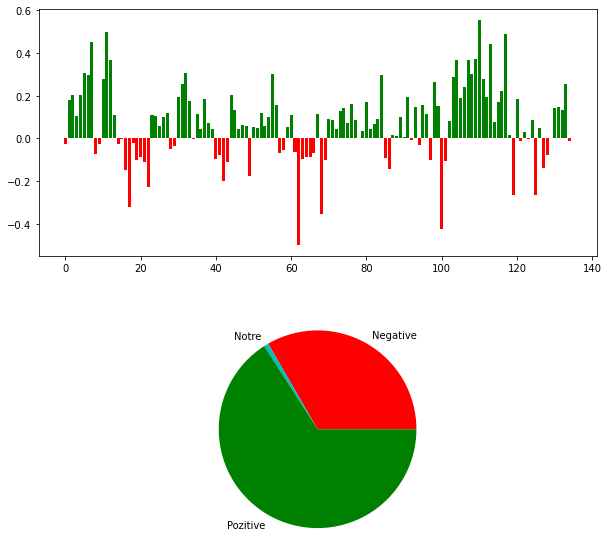

In [10]:
fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].bar(BiggerData.index,BiggerData["Score"],color=BiggerData.Class.map({"Pozitive": 'g', "Negative": 'r',"Notre":'b'}))
axs[1].pie(BiggerData.groupby("Class").count()["Score"],labels =['Negative','Notre','Pozitive'],colors=('r','c','g'))

plt.show()

In [19]:
def instantCompute(word):
    print(TextBlob(word).translate(to = "en"))
    return TextBlob(word).translate(to = "en").sentiment.polarity
print(instantCompute(input("If you want,you can enter a word but it must be turkish: ")))

If you want,you can enter a word but it must be turkish: iyi
good
0.7
